#Imports & Setup

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Sets the overall theme/style of Matplotlib plots
plt.style.use('seaborn-v0_8')
#Sets the color palette for Seaborn plots.
sns.set_palette("Set2")

#Load Cleaned Dataset

In [4]:
df = pd.read_csv("cleaned_flights.csv")

df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,MONTH,DAY_OF_WEEK,HOUR,ROUTE
0,2022-07-22,UNITED AIR LINES INC.,United Air Lines Inc.: UA,UA,19977.0,459.0,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,680.0,0.0,0.0,0.0,0.0,0.0,7,4,10.0,DEN-MSP
1,2019-07-31,SOUTHWEST AIRLINES CO.,Southwest Airlines Co.: WN,WN,19393.0,665.0,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",...,181.0,141.0,0.0,0.0,0.0,0.0,7,2,12.0,DAL-OKC
2,2021-06-11,DELTA AIR LINES INC.,Delta Air Lines Inc.: DL,DL,19790.0,2820.0,ATL,"Atlanta, GA",BDL,"Hartford, CT",...,859.0,60.0,0.0,0.0,0.0,0.0,6,4,19.0,ATL-BDL
3,2021-08-05,SOUTHWEST AIRLINES CO.,Southwest Airlines Co.: WN,WN,19393.0,430.0,MDW,"Chicago, IL",BNA,"Nashville, TN",...,395.0,0.0,0.0,0.0,0.0,0.0,8,3,8.0,MDW-BNA
4,2022-05-01,SOUTHWEST AIRLINES CO.,Southwest Airlines Co.: WN,WN,19393.0,1011.0,BWI,"Baltimore, MD",BDL,"Hartford, CT",...,283.0,0.0,0.0,0.0,0.0,0.0,5,6,17.0,BWI-BDL


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3944 entries, 0 to 3943
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FL_DATE                  3944 non-null   object 
 1   AIRLINE                  3944 non-null   object 
 2   AIRLINE_DOT              3944 non-null   object 
 3   AIRLINE_CODE             3944 non-null   object 
 4   DOT_CODE                 3944 non-null   float64
 5   FL_NUMBER                3944 non-null   float64
 6   ORIGIN                   3944 non-null   object 
 7   ORIGIN_CITY              3944 non-null   object 
 8   DEST                     3944 non-null   object 
 9   DEST_CITY                3944 non-null   object 
 10  CRS_DEP_TIME             3944 non-null   float64
 11  DEP_TIME                 3936 non-null   object 
 12  DEP_DELAY                3944 non-null   float64
 13  TAXI_OUT                 3944 non-null   float64
 14  WHEELS_OFF              

#UNIVARIATE & BIVARIATE ANALYSIS

**1.Top Airlines by Flights**

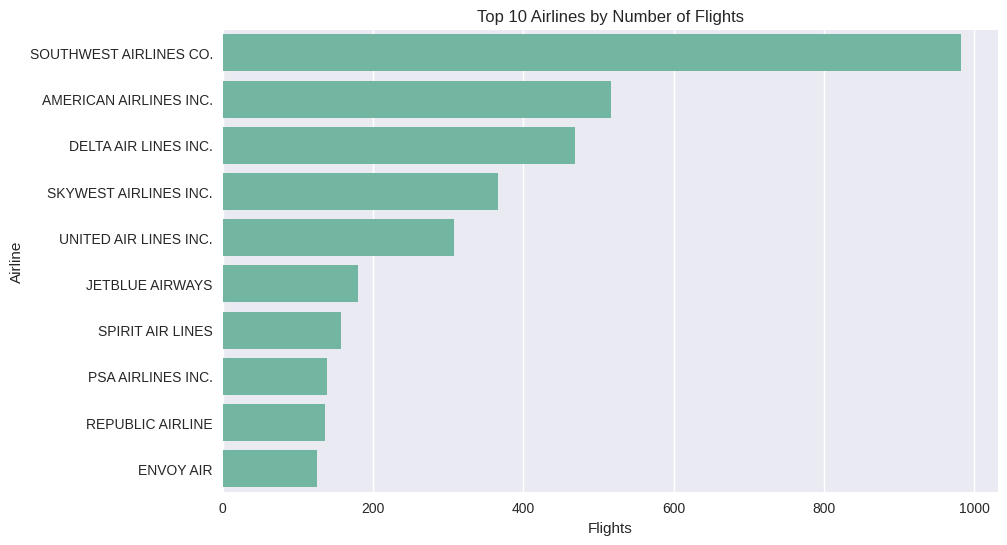

In [ ]:
top_airlines = df['AIRLINE'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_airlines.values, y=top_airlines.index)
plt.title("Top 10 Airlines by Number of Flights")
plt.xlabel("Flights")
plt.ylabel("Airline")
plt.show()

## Insights from Top 10 Airlines by Number of Flights

- Southwest Airlines operates the highest number of flights in the dataset.
- American Airlines and Delta Air Lines are the next largest carriers.
- The top three airlines handle a significantly higher number of flights compared to others.
- Mid-level airlines such as SkyWest and United have moderate operations.
- The remaining airlines operate comparatively fewer flights.

**Conclusion:**  
The flight distribution is concentrated among a few major airlines, indicating that a small number of carriers dominate overall operations in this dataset.

**2.Flight Distribution by Month**

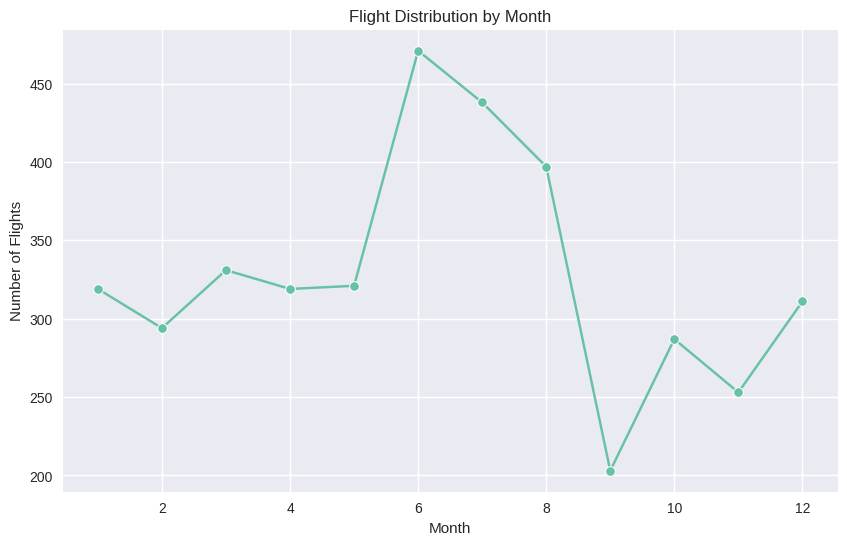

In [ ]:
monthly_counts = df['MONTH'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.title("Flight Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.show()

- The X-axis represents the months of the year (1–12).
- The Y-axis represents the total number of flights in each month.
- Each point on the line shows the number of flights for a specific month.
- The line connects the points to show the overall monthly trend.

By observing the graph:
- Upward movement indicates an increase in flight activity.
- Downward movement indicates a decrease in flight activity.
- Peaks represent months with the highest flight operations.
- Dips represent months with lower flight activity.

This visualization helps understand seasonal patterns and monthly trends in flight operations.

**3.Flight Distribution by Hour**

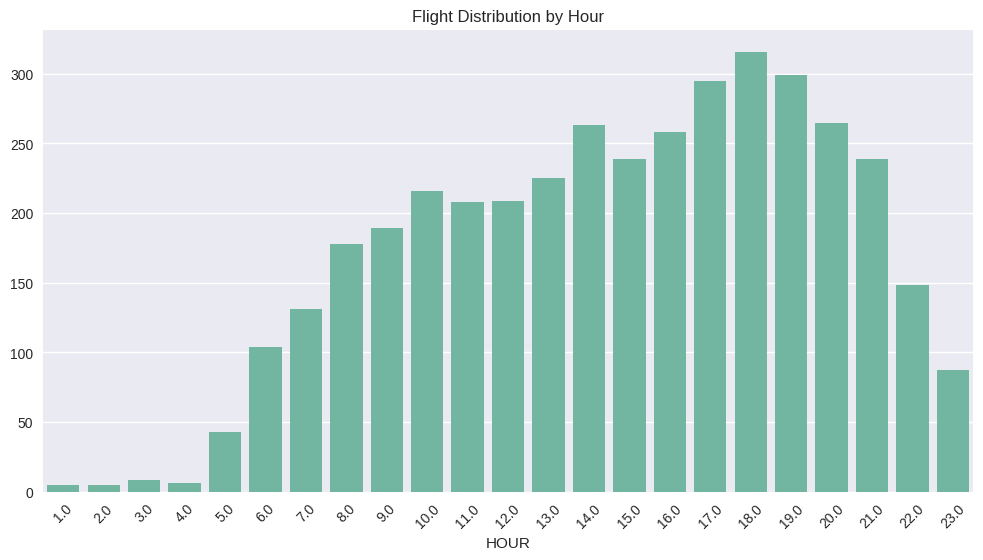

In [14]:
hour_counts = df['HOUR'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title("Flight Distribution by Hour")
plt.xticks(rotation=45)
plt.show()

- The X-axis represents the hour of the day (0–23).
- The Y-axis represents the total number of flights during each hour.
- Each bar shows how many flights were scheduled or operated in that specific hour.

By observing the height of the bars:
- Taller bars indicate peak flight hours (more traffic).
- Shorter bars indicate low flight activity periods.

This chart helps identify busy and less busy time slots during the day.

**4.Top 10 Routes**

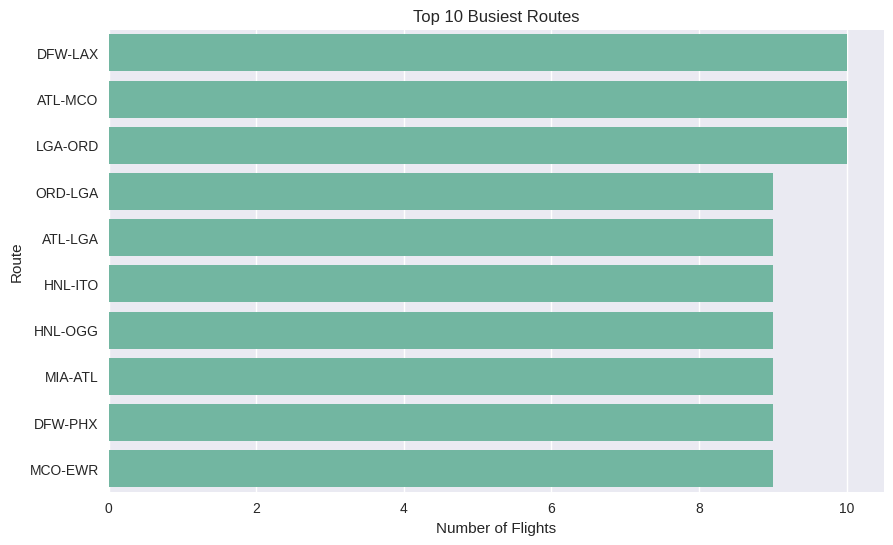

In [15]:
top_routes = df['ROUTE'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_routes.values, y=top_routes.index)
plt.title("Top 10 Busiest Routes")
plt.xlabel("Number of Flights")
plt.ylabel("Route")
plt.show()

- The Y-axis represents the top 10 busiest flight routes.
- The X-axis represents the total number of flights operated on each route.
- Each horizontal bar corresponds to one route.
- The number displayed next to each bar shows the exact flight count.

Longer bars indicate higher traffic routes, meaning those routes have greater passenger demand and operational activity.

This visualization helps identify the most active routes in the dataset and understand traffic concentration across different flight paths.

**5.Arrival Delay Distribution**

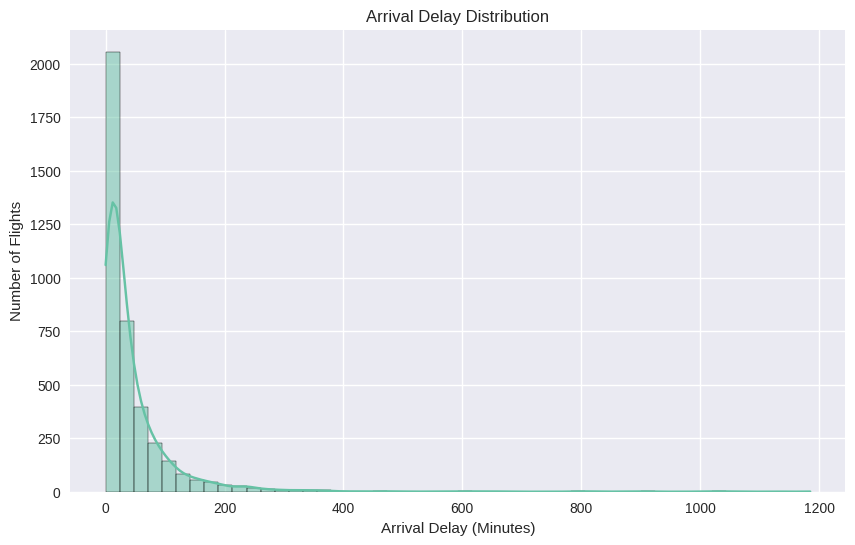

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['ARR_DELAY'], bins=50, kde=True)
plt.title("Arrival Delay Distribution")
plt.xlabel("Arrival Delay (Minutes)")
plt.ylabel("Number of Flights")
plt.show()

- The X-axis represents arrival delay in minutes.
  - Negative values indicate early arrivals.
  - Positive values indicate late arrivals.
- The Y-axis represents the number of flights within each delay range.
- Each bar shows how many flights fall into a specific delay interval.
- The smooth curve (KDE line) shows the overall distribution pattern of delays.

This visualization helps understand how arrival delays are distributed and whether most flights arrive on time, early, or late.

Observation: Right-skewed distribution (connect to Milestone 1)

#DELAY ANALYSIS

**6.Average Delay by Airline**

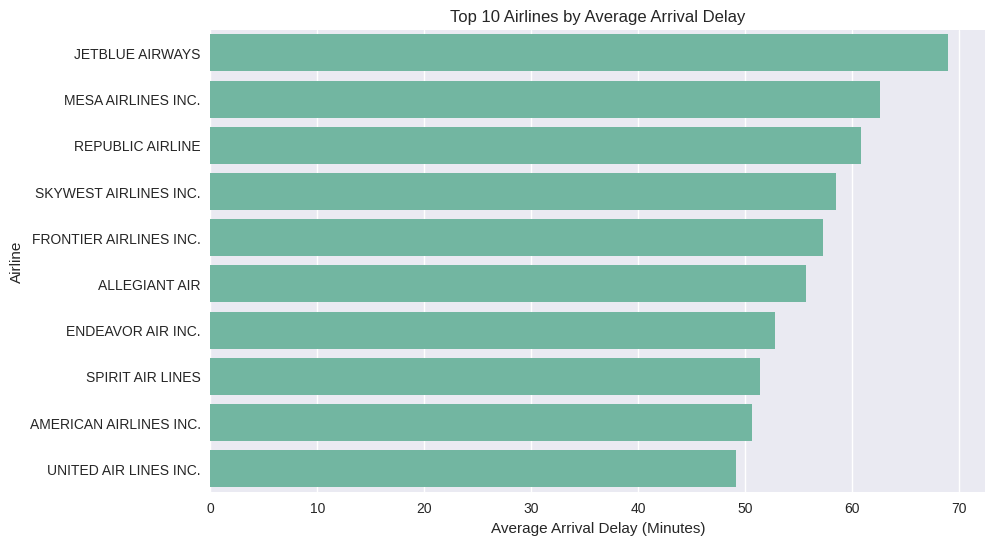

In [18]:
airline_delay = df.groupby('AIRLINE')['ARR_DELAY'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=airline_delay.values, y=airline_delay.index)
plt.title("Top 10 Airlines by Average Arrival Delay")
plt.xlabel("Average Arrival Delay (Minutes)")
plt.ylabel("Airline")
plt.show()

- The Y-axis represents the airlines.
- The X-axis represents the average arrival delay in minutes.
- Each bar shows the mean delay for a specific airline.
- Longer bars indicate airlines with higher average delays.

This visualization helps compare airline performance and identify carriers that experience higher average arrival delays.

**7.Delay Cause Comparison**

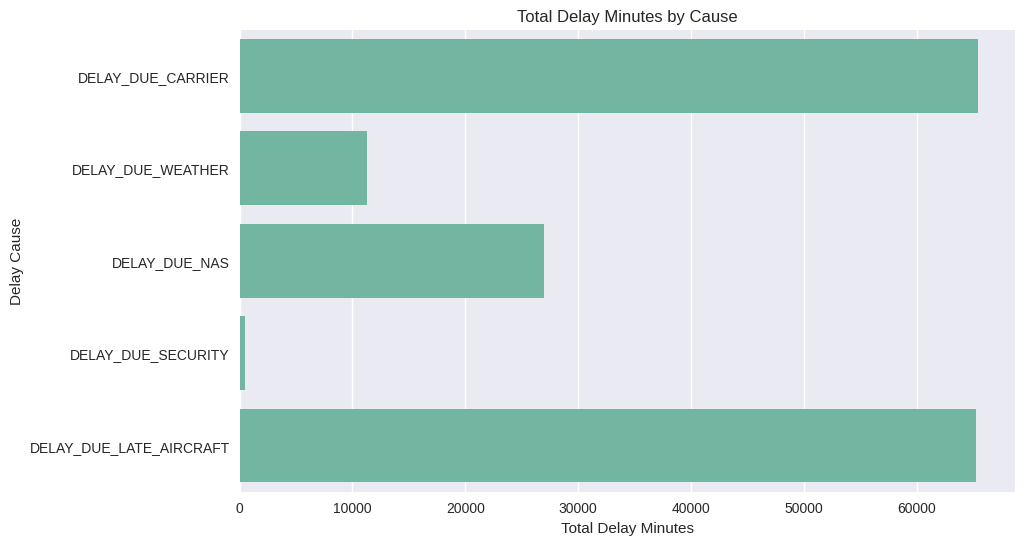

In [19]:
delay_causes = df[['DELAY_DUE_CARRIER',
                   'DELAY_DUE_WEATHER',
                   'DELAY_DUE_NAS',
                   'DELAY_DUE_SECURITY',
                   'DELAY_DUE_LATE_AIRCRAFT']].sum()

plt.figure(figsize=(10,6))
sns.barplot(x=delay_causes.values, y=delay_causes.index)
plt.title("Total Delay Minutes by Cause")
plt.xlabel("Total Delay Minutes")
plt.ylabel("Delay Cause")
plt.show()


- The Y-axis represents different causes of flight delays.
- The X-axis represents the total delay minutes accumulated for each cause.
- Each bar shows the overall impact of a specific delay factor.
- Longer bars indicate causes that contribute more significantly to total flight delays.

This visualization helps identify the primary factors responsible for delays and supports operational improvement decisions.

**8.Delay Cause Percentage Contribution**

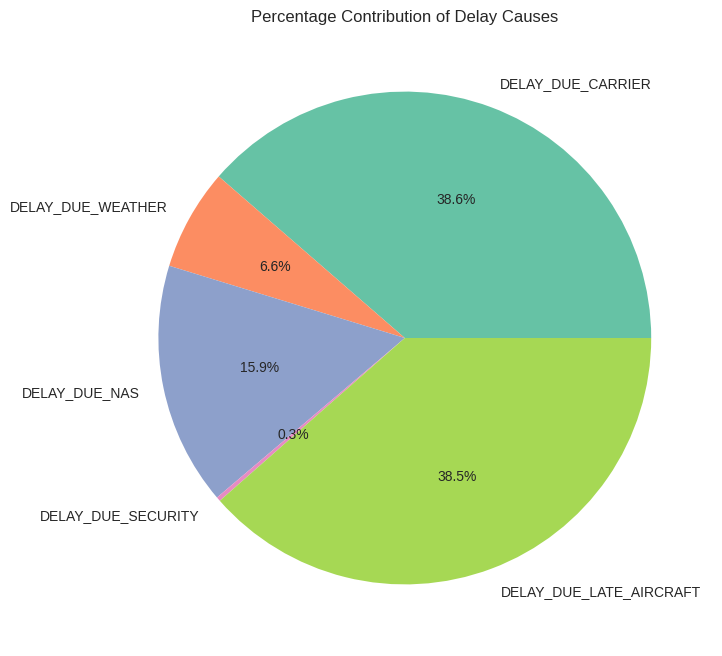

In [ ]:
delay_totals = df[['DELAY_DUE_CARRIER',
                   'DELAY_DUE_WEATHER',
                   'DELAY_DUE_NAS',
                   'DELAY_DUE_SECURITY',
                   'DELAY_DUE_LATE_AIRCRAFT']].sum()

delay_percent = delay_totals / delay_totals.sum() * 100

plt.figure(figsize=(8,8))
plt.pie(delay_percent, labels=delay_percent.index, autopct='%1.1f%%')
plt.title("Percentage Contribution of Delay Causes")
plt.show()

- Each slice represents a specific cause of flight delay.
- The percentage shows the contribution of each factor to total delay minutes.
- Larger slices indicate major contributors to overall delays.
- Smaller slices represent less significant delay factors.

This visualization helps identify which operational areas require priority attention for delay reduction.

**9.Weather Delay Trend by Month**

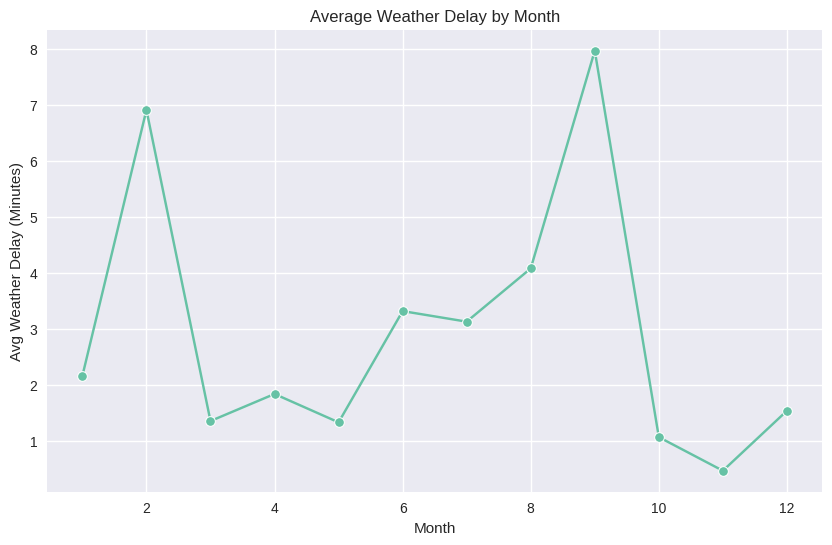

In [6]:
weather_monthly = df.groupby('MONTH')['DELAY_DUE_WEATHER'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=weather_monthly.index,
             y=weather_monthly.values,
             marker='o')
plt.title("Average Weather Delay by Month")
plt.xlabel("Month")
plt.ylabel("Avg Weather Delay (Minutes)")
plt.show()

- The X-axis represents the months of the year (1–12).
- The Y-axis represents the average delay in minutes caused by weather.
- Each point shows the mean weather delay for that month.
- The line connects monthly values to highlight seasonal trends.

Higher points indicate months where weather had a greater impact on flight delays.
This analysis helps identify seasonal patterns and supports operational planning.

**10.Heatmap – Correlation**



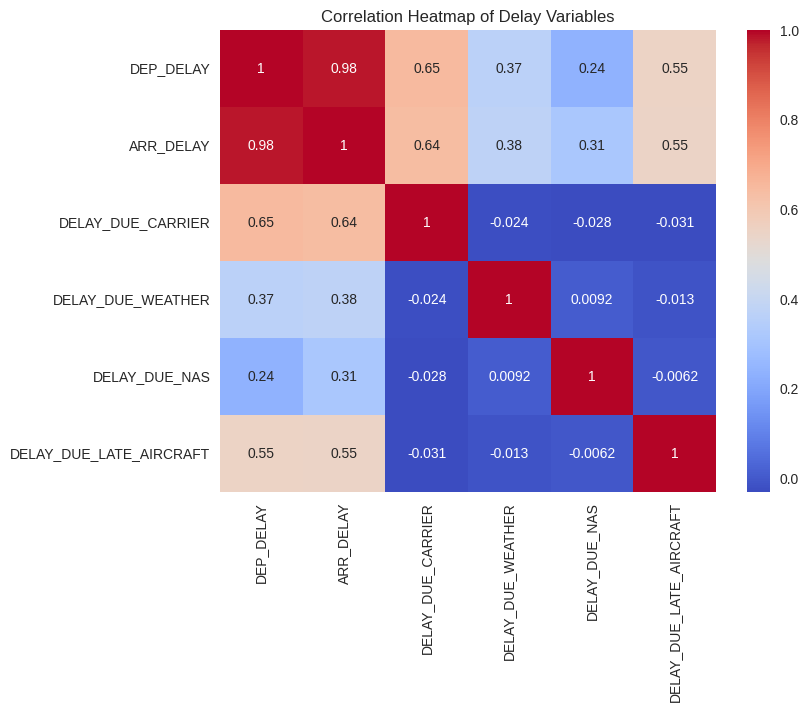

In [ ]:
plt.figure(figsize=(8,6))
corr = df[['DEP_DELAY','ARR_DELAY',
           'DELAY_DUE_CARRIER',
           'DELAY_DUE_WEATHER',
           'DELAY_DUE_NAS',
           'DELAY_DUE_LATE_AIRCRAFT']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Delay Variables")
plt.show()

### Correlation Heatmap of Delay Variables

This heatmap shows the correlation between different types of flight delays.

- Values range from **-1 to +1**
- **+1** → Strong positive correlation
- **0** → No correlation
- **-1** → Strong negative correlation

Darker red indicates strong positive relationship.
Darker blue indicates strong negative relationship.

This helps us understand which delay factors move together.
#Insights:
The correlation heatmap shows that departure delay has a strong positive relationship with arrival delay, indicating operational dependency. Late aircraft delays also show significant correlation, suggesting cascading delays. However, weather delays show relatively weaker correlation, indicating external uncontrollable factors.

**11.Delay by Hour**

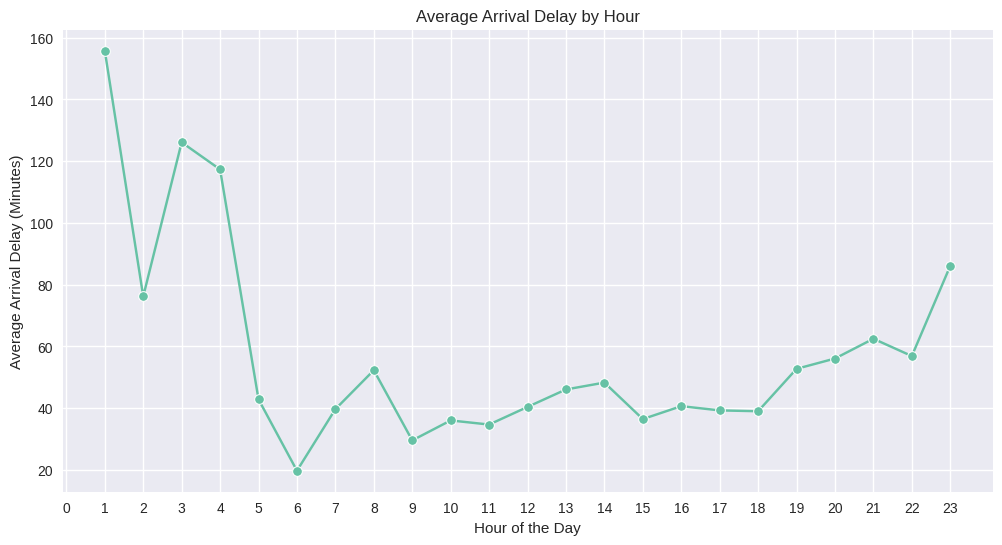

In [22]:
hour_delay = df.groupby('HOUR')['ARR_DELAY'].mean()

plt.figure(figsize=(12,6))

sns.lineplot(x=hour_delay.index,
             y=hour_delay.values,
             marker='o')

plt.title("Average Arrival Delay by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Arrival Delay (Minutes)")

plt.xticks(range(0,24))
plt.show()

#Insights
1️⃣ Very Late Night (1–4 AM)

Delays are very high.

Flights arriving at this time are mostly very late.

👉 This may happen because delays from the previous day carry forward.

2️⃣ Early Morning (5–7 AM)

Delays are lowest around 6 AM.

Flights are more on time.

👉 Morning flights are usually more punctual.

3️⃣ Afternoon (10 AM – 4 PM)

Delays are moderate.

Not too high, not too low.

👉 Operations are stable during this time.

4️⃣ Evening to Night (7 PM – 11 PM)

Delays increase again.

Highest again around 11 PM.

👉 Delays build up as the day goes on.

🎯 Overall Simple Conclusion

Flights are most on time in the early morning.

Delays increase as the day progresses.

Very late-night flights show very high delays.

**12.Delay by Day of Week**

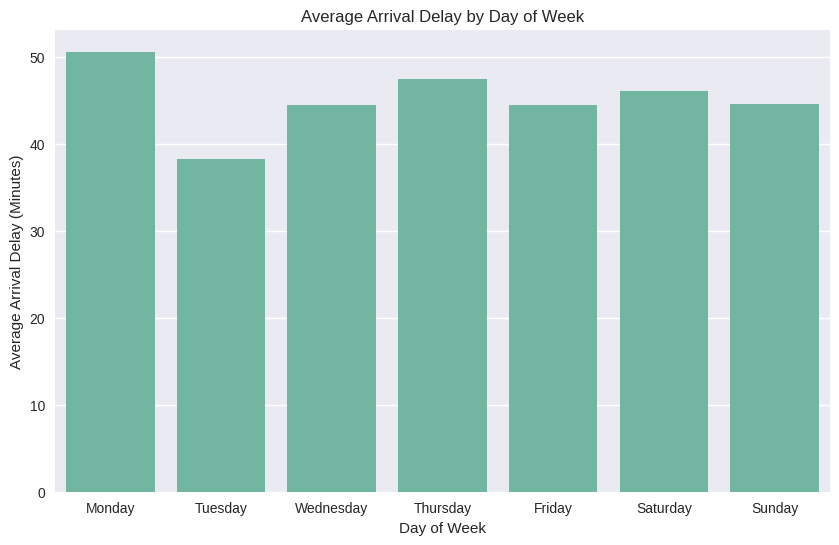

In [23]:
day_delay = df.groupby('DAY_OF_WEEK')['ARR_DELAY'].mean()

day_mapping = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}

day_delay.index = day_delay.index.map(day_mapping)

plt.figure(figsize=(10,6))
sns.barplot(x=day_delay.index, y=day_delay.values)

plt.title("Average Arrival Delay by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Arrival Delay (Minutes)")

plt.show()

### Average Arrival Delay by Day of Week

This bar chart shows the average arrival delay for each day of the week.

- The dataset is grouped by **DAY_OF_WEEK**.
- The mean arrival delay is calculated for each day.
- Day numbers are converted into weekday names for better readability.

X-axis → Day of Week  
Y-axis → Average Arrival Delay (Minutes)

This visualization helps identify whether certain days experience higher delays due to increased traffic or operational factors.

**13.Heatmap – Month vs Hour**

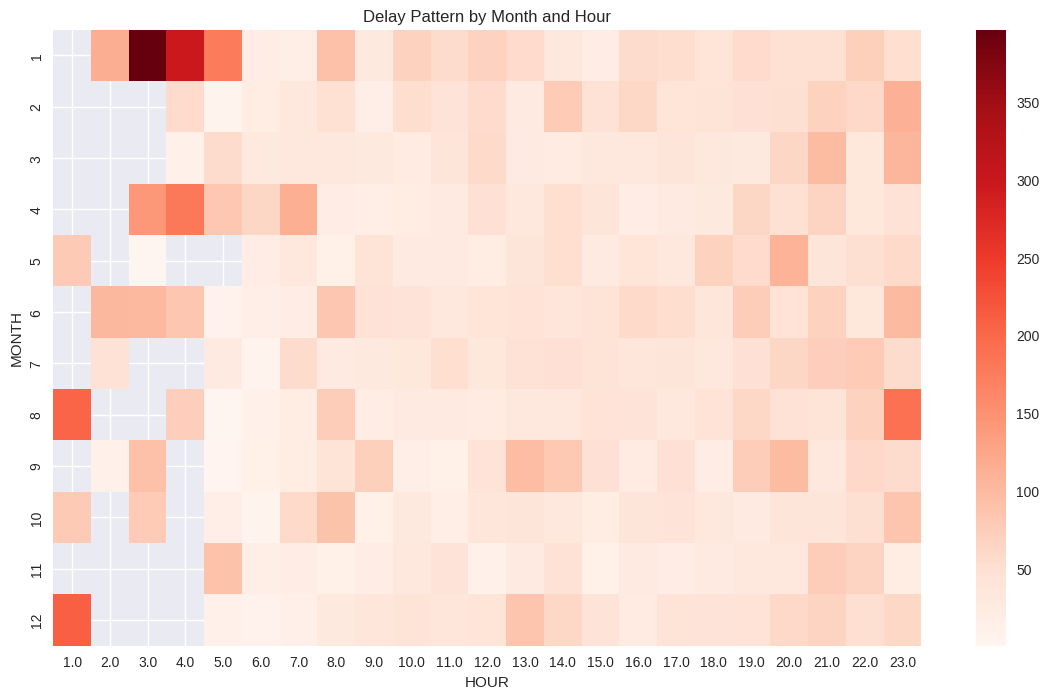

In [8]:
pivot = df.pivot_table(values='ARR_DELAY',
                       index='MONTH',
                       columns='HOUR',
                       aggfunc='mean')

plt.figure(figsize=(14,8))
sns.heatmap(pivot, cmap='Reds')
plt.title("Delay Pattern by Month and Hour")
plt.show()

### Delay Pattern by Month and Hour

This heatmap shows the average arrival delay for each month and hour combination.

- Darker red indicates higher delays.
- Lighter shades indicate lower delays.

Key Insights:
- Late-night hours (2–4 AM) show very high delays in some months.
- August and December show higher delay patterns compared to other months.
- Midday hours generally have moderate and stable delays.
- Delays slightly increase again during late evening hours.

This visualization helps identify seasonal and time-based delay patterns together.

**14.Scatter – Departure vs Arrival Delay**

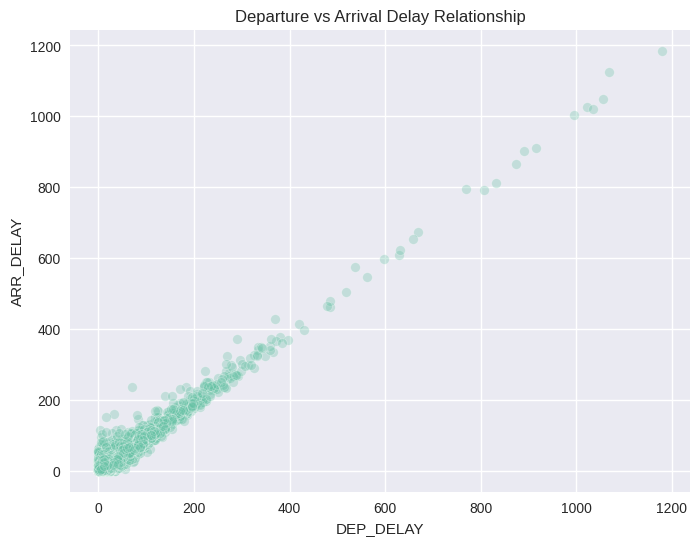

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['DEP_DELAY'],
                y=df['ARR_DELAY'],
                alpha=0.3)
plt.title("Departure vs Arrival Delay Relationship")
plt.show()

### Departure vs Arrival Delay Relationship

This scatter plot shows the relationship between departure delay and arrival delay.

- Each point represents one flight.
- X-axis → Departure Delay (minutes)
- Y-axis → Arrival Delay (minutes)

### Strong Positive Relationship Interpretation

If most points in the scatter plot lie along an upward diagonal line, it indicates a strong positive relationship between departure delay and arrival delay.

This means:

- Flights that depart late are likely to arrive late.
- As departure delay increases, arrival delay also increases.
- The delays move together in the same direction.

This pattern suggests that departure delays directly impact arrival delays.

**15.Delay Percentage (>15 min)**

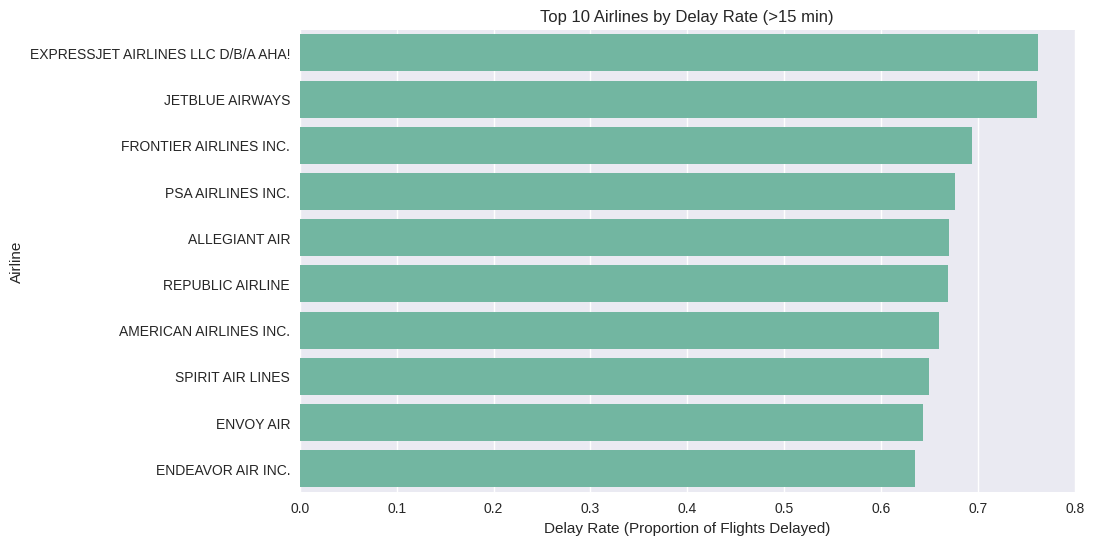

In [24]:
df['IS_DELAYED'] = (df['ARR_DELAY'] > 15).astype(int)

delay_rate = df.groupby('AIRLINE')['IS_DELAYED'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=delay_rate.values, y=delay_rate.index)
plt.title("Top 10 Airlines by Delay Rate (>15 min)")
plt.xlabel("Delay Rate (Proportion of Flights Delayed)")
plt.ylabel("Airline")
plt.show()

### Top 10 Airlines by Delay Rate (>15 Minutes)

This analysis identifies airlines with the highest percentage of delayed flights.

- A new column `IS_DELAYED` is created:
  - 1 → Arrival delay greater than 15 minutes
  - 0 → On-time or minor delay
- The average of this column per airline represents the delay rate.
- Airlines are sorted in descending order to identify the worst-performing airlines.

This metric shows airline reliability based on the proportion of delayed flights, rather than average delay minutes.

**16.Rolling Average**

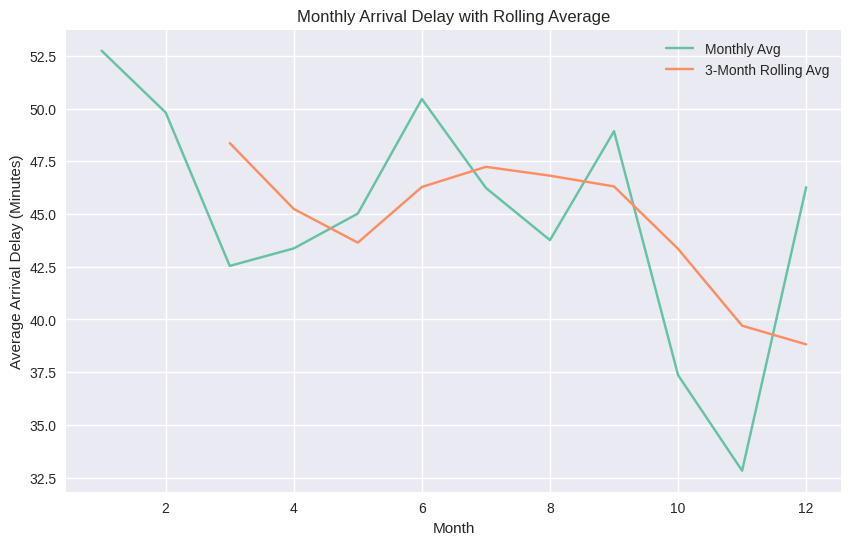

In [25]:
monthly_delay = df.groupby('MONTH')['ARR_DELAY'].mean()

rolling_avg = monthly_delay.rolling(window=3).mean()

plt.figure(figsize=(10,6))
plt.plot(monthly_delay.index, monthly_delay.values, label='Monthly Avg')
plt.plot(rolling_avg.index, rolling_avg.values, label='3-Month Rolling Avg')
plt.legend()
plt.title("Monthly Arrival Delay with Rolling Average")
plt.xlabel("Month")
plt.ylabel("Average Arrival Delay (Minutes)")
plt.show()

### Monthly Arrival Delay with Rolling Average

This visualization shows the monthly average arrival delay along with a 3-month rolling average.

- The first line represents actual monthly average delay.
- The rolling average smooths short-term fluctuations.
- A 3-month window is used to highlight overall trends.

This helps identify seasonal patterns and long-term delay trends more clearly.

**17.Log Transformation (for skewed distribution)**

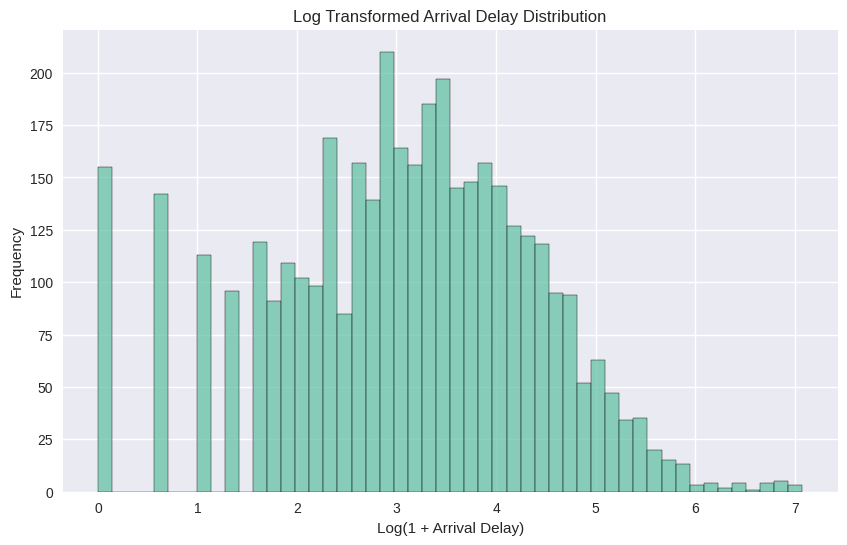

In [26]:
import numpy as np

df['LOG_ARR_DELAY'] = np.log1p(df['ARR_DELAY'])

plt.figure(figsize=(10,6))
sns.histplot(df['LOG_ARR_DELAY'], bins=50)
plt.title("Log Transformed Arrival Delay Distribution")
plt.xlabel("Log(1 + Arrival Delay)")
plt.ylabel("Frequency") #number of flights
plt.show()

### Log Transformed Arrival Delay Distribution

Arrival delay data is typically right-skewed due to extreme delay values.

To reduce skewness and minimize the impact of outliers, a log transformation (log1p) is applied.

- log1p(x) = log(1 + x)
- Helps handle zero values safely
- Makes the distribution more balanced

This transformation is useful for improving statistical modeling and analysis.

📊 Insights: Log Transformed Arrival Delay Distribution
1️⃣ Distribution is More Balanced

The original arrival delay data is usually highly right-skewed (few very large delays).

After log transformation, the distribution looks more symmetric and smooth.

Extreme values are compressed.

2️⃣ Most Flights Have Moderate Delays

Majority of values lie roughly between 2 and 4 (log scale).

This means most flights have small to moderate delays.

Very large delays are less frequent.

3️⃣ Extreme Delays Still Exist (But Reduced Impact)

The right tail still extends toward 6–7.

This shows that extreme delays still occur.

However, they no longer dominate the visualization.

4️⃣ Presence of Values Near 0

Some bars near 0 indicate:

On-time flights

Very small delays

Using log1p() allowed these values to be included safely.

**18.Weather vs Carrier Comparison Over Time**

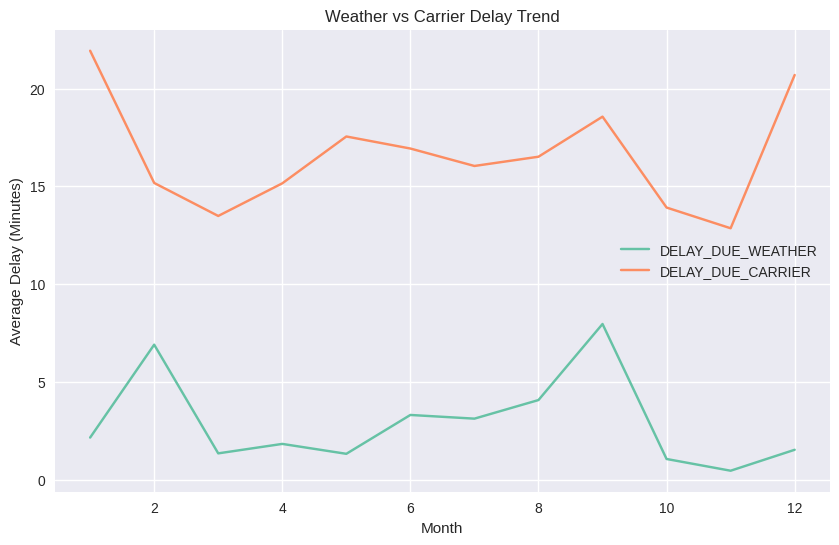

In [27]:
monthly_cause = df.groupby('MONTH')[['DELAY_DUE_WEATHER',
                                     'DELAY_DUE_CARRIER']].mean()

monthly_cause.plot(figsize=(10,6))
plt.title("Weather vs Carrier Delay Trend")
plt.xlabel("Month")
plt.ylabel("Average Delay (Minutes)")
plt.legend()
plt.show()

### Weather vs Carrier Delay Trend – Insights

- Carrier-related delays are consistently higher than weather-related delays across all months.
- Carrier delays range between approximately 13–22 minutes on average.
- Weather delays remain relatively low but show seasonal spikes.
- Months 1 and 12 show higher carrier delays, possibly due to peak travel periods.
- Operational inefficiencies appear to contribute more to delays than weather conditions.

Overall, airline performance improvements may have a greater impact on reducing delays compared to weather-related factors.

**19.Flight Status Distribution**

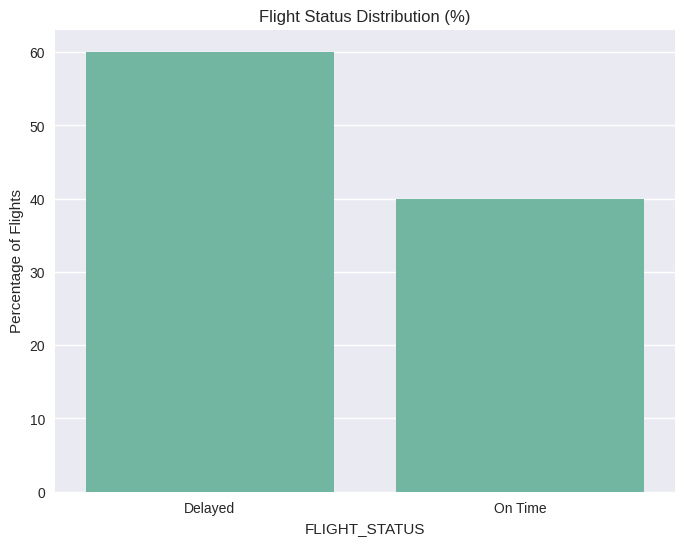

In [13]:
df['FLIGHT_STATUS'] = 'On Time'

df.loc[df['ARR_DELAY'] > 15, 'FLIGHT_STATUS'] = 'Delayed'
df.loc[df['CANCELLED'] == 1, 'FLIGHT_STATUS'] = 'Cancelled'

status_counts = df['FLIGHT_STATUS'].value_counts()

status_percent = df['FLIGHT_STATUS'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,6))
sns.barplot(x=status_percent.index,
            y=status_percent.values)

plt.title("Flight Status Distribution (%)")
plt.ylabel("Percentage of Flights")
plt.show()

### Flight Status Distribution Insight

- 60% of flights are delayed.
- 40% of flights arrive on time.

This indicates that the majority of flights experience delays beyond 15 minutes.
The airline's operational efficiency may require improvement to enhance on-time performance and customer satisfaction.